In [139]:
import pandas as pd
import os

os.getcwd()
# indexing_col = 일련번호
data = pd.read_csv("./data/20250716/Developer Salary.csv", encoding="euc-kr", index_col = "일련번호")
data

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수
일련번호,,,,,,,,,,
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7
DEV2,<35,Undergraduate,Man,No,Dev,9,6,Canada,46135,13
DEV3,>35,Master,Man,No,Dev,26,18,Germany,77831,17
DEV4,>35,Undergraduate,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507,3
DEV5,<35,Master,Man,No,Dev,19,10,Germany,60535,5
...,...,...,...,...,...,...,...,...,...,...
DEV33462,<35,Master,Man,Yes,Dev,7,5,United States of America,94000,5
DEV33463,<35,Undergraduate,Man,No,Dev,7,2,Germany,41058,13
DEV33464,>35,Undergraduate,Man,No,Dev,21,16,United States of America,115000,11


In [140]:
# 환율 1,390원을 적용해서 월급 구해서 월급컬럼 추가
data['월급'] = (data['연봉']/12*1390).astype(int)
data

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수,월급
일련번호,,,,,,,,,,,
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7,8952758
DEV2,<35,Undergraduate,Man,No,Dev,9,6,Canada,46135,13,5343970
DEV3,>35,Master,Man,No,Dev,26,18,Germany,77831,17,9015424
DEV4,>35,Undergraduate,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507,3,7935394
DEV5,<35,Master,Man,No,Dev,19,10,Germany,60535,5,7011970
...,...,...,...,...,...,...,...,...,...,...,...
DEV33462,<35,Master,Man,Yes,Dev,7,5,United States of America,94000,5,10888333
DEV33463,<35,Undergraduate,Man,No,Dev,7,2,Germany,41058,13,4755885
DEV33464,>35,Undergraduate,Man,No,Dev,21,16,United States of America,115000,11,13320833


In [141]:
# 국적별 개발자의 월급 평균
# 기존의 집계함수 활용했던 방식
# couuntry_pay_mean = data.groupby("국적").agg({"월급" : "mean"}).astype(int)
# couuntry_pay_mean

# 국적과 월급 컬럼만 인덱싱해서 새로운 country_pay로 담아주는 과정
country_pay = data[["국적", "월급"]]
country_pay 
df_month_wage = country_pay.groupby("국적").mean().astype(int)
df_month_wage

,월급
국적,
Canada,10002535
Germany,8093836
India,2805176
Japan,7559131
South Korea,5499325
United Kingdom of Great Britain and Northern Ireland,9396055
United States of America,14337387


Index(['Canada', 'Germany', 'India', 'Japan', 'South Korea',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America'],
      dtype='object', name='국적')
국적
Canada                                                  10002535
Germany                                                  8093836
India                                                    2805176
Japan                                                    7559131
South Korea                                              5499325
United Kingdom of Great Britain and Northern Ireland     9396055
United States of America                                14337387
Name: 월급, dtype: int64


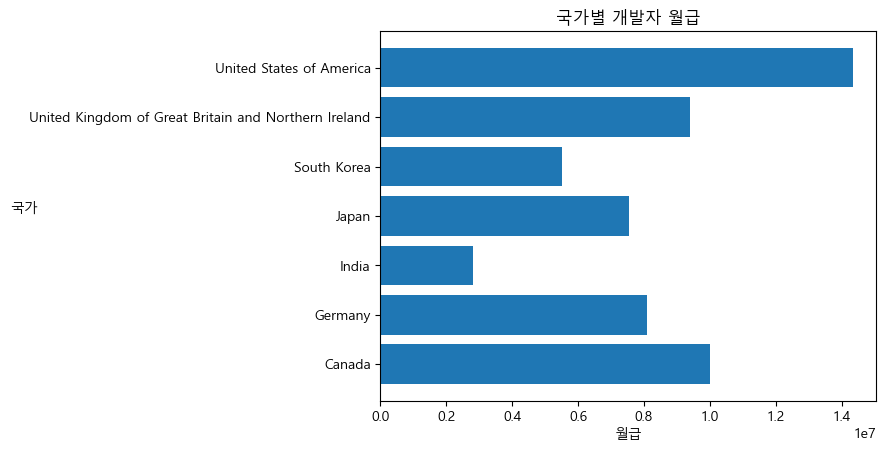

In [142]:
# 수평 막대 그래프로 데이터 확인하기!
import matplotlib.pyplot as plt
# 한글사용 
plt.rc('font', family='Malgun Gothic') # 윈도우 한글 폰트

x = df_month_wage.index# 국가데이터
y = df_month_wage["월급"] # 월급데이터 

print(x)
print(y)

plt.barh (x, y )
plt.title("국가별 개발자 월급")
plt.xlabel("월급")
plt.ylabel("국가", rotation=0)
plt.show()

In [ ]:
# 학력별 평균 월급 비교
wage_of_graduate = data[["학력", "월급"]]
display(wage_of_graduate)


# 학력별 그룹묶음 
df_wage_of_graduate = wage_of_graduate.groupby("학력").mean().astype(int)
display(df_wage_of_graduate)

x = df_wage_of_graduate.index
y = df_wage_of_graduate["월급"]

plt.bar(x, y)

plt.show()


,성별,월급
일련번호,,
DEV1,Man,8952758
DEV2,Man,5343970
DEV3,Man,9015424
DEV4,Man,7935394
DEV5,Man,7011970
...,...,...
DEV33462,Man,10888333
DEV33463,Man,4755885
DEV33464,Man,13320833


,월급
성별,
Man,10326591
NonBinary,10652088
Woman,9932266


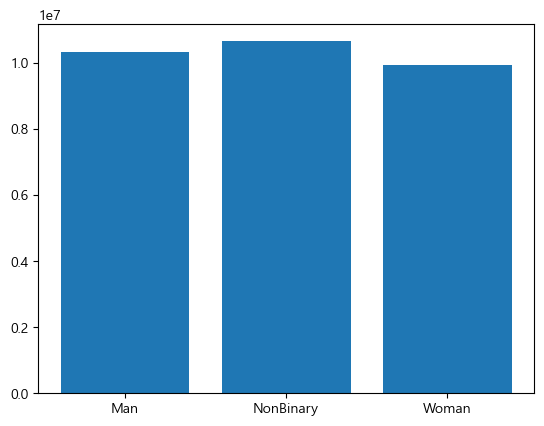

In [143]:
# 성별 평균 월급 비교

# 성별과 월급 컬럼만 인덱싱해서 새로운 wage_of_graduate로 담아주는 과정
wage_of_sex = data[["성별", "월급"]]
display(wage_of_sex)


# 성별 그룹묶음
df_wage_of_sex = wage_of_sex.groupby("성별").mean().astype(int)
display(df_wage_of_sex)

x = df_wage_of_sex.index
y = df_wage_of_sex["월급"]

plt.bar(x, y)

plt.show()

In [ ]:
# pandas의 내장 시각화 기능 활용


#colormap 속성
# 1.연속형(colormap for continuous data): 연속적인 값에 대해 색상을 지정할 때 사용
# viridis: 퍼지는 색상(보라색 → 노란색), 기본
# plasma: 뜨거운 색상(보라색 → 빨강, 노랑)
# inferno: 더 뜨거운 색상(검정 → 빨강 → 노랑)
# magma: 차가운 색상(검정 → 보라 → 노랑)
# cividis: 시각 장애인을 고려한 색상
# twilight: 흰색과 파란색을 강조하는 색상
# copper: 주로 금속 계열의 색상(갈색 → 금색)
# coolwarm: 파란색에서 빨간색으로 가는 그라데이션
# YlGnBu: 노랑 → 초록 → 파랑 그라데이션
# RdYlBu: 빨강 → 노랑 → 파랑 그라데이션
 
# 2.범주형(colormap for categorical data): 데이터가 범주형일 때 사용할 수 있는 색상
# Set1, Set2, Set3: 범주형 색상 중에서 자주 사용되는 컬러셋.
# Pastel1, Pastel2: 부드러운 색상셋.
# Paired: 다양한 색이 조화를 이루는 색상셋.
# Dark2: 더 어두운 색상셋.
# Accent: 다채로운 색상셋.
 
# 3.기타 범주형 색상:
# tab10: 10가지 색상으로 구성된 색상 셋.
# tab20: 20가지 색상으로 구성된 색상 셋.
# Set1: 파스텔 계열의 색상 셋.
# rainbow: 무지개 색상(빨강 → 보라)
# spring: 분홍색에서 노란색으로 변하는 색상.
# summer: 녹색에서 노란색으로 변하는 색상.
# autumn: 빨간색에서 노란색으로 변하는 색상.
# winter: 파란색에서 초록색으로 변하는 색상.


<Axes: title={'center': '학력별 개발자 월급 평균'}, ylabel='학력'>

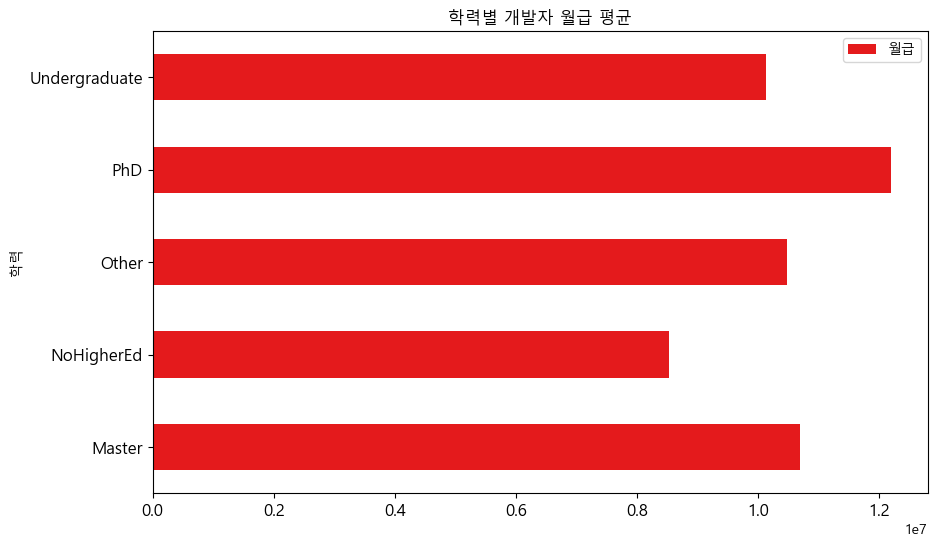

In [144]:

# 예쁘게 시각화하기

df_wage_of_graduate.plot(kind='barh', colormap='Set1', title='학력별 개발자 월급 평균', figsize=(10, 6), fontsize=12)



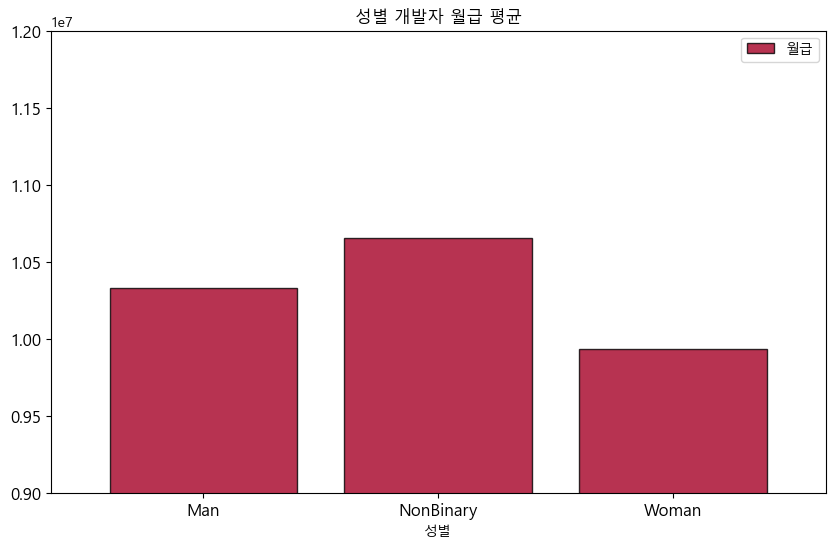

In [145]:
# 그라데이션 컬러로 그래프 보여주기, 다른 특수기능 사용하기
df_wage_of_sex.plot(kind='bar', colormap='RdYlBu', title='성별 개발자 월급 평균', figsize=(10, 6), fontsize=12, width=0.8, edgecolor='black', linewidth=1, alpha=0.8)
# 리미트 설정해서 보여주는부분 좀 더 확대시키기 .
plt.ylim(0.9e7, 1.2e7)
# x축 레이블 회전
plt.xticks(rotation = 0)
plt.show()

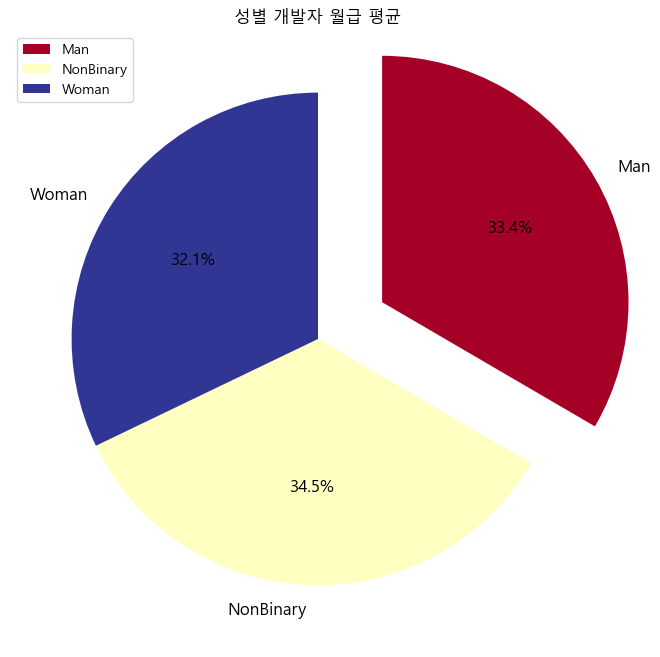

In [146]:
# pie 차트로 시각화하기
# 파이차트로 성별 개발자 월급 평균 시각화
df_wage_of_sex.plot(kind='pie', y='월급', autopct='%1.1f%%', startangle=90, 
                    colormap='RdYlBu', title='성별 개발자 월급 평균', 
                    figsize=(8, 8), fontsize=12, explode=(0.3, 0, 0), counterclock=False )
plt.ylabel('')  # y축 레이블 제거 (파이차트에서는 불필요)
plt.show()



# 멀티인덱스
- 2개 이상의 컬럼을 동시에 인덱스로 갖는 경우
`

In [115]:
# 성별, 학력, 평균월급
df_multi_index = data[["성별", "학력", "월급"]]
display(df_multi_index)

# 멀티인덱스 데이터프레임 생성 평균을 구한다. 
df_multi_index = df_multi_index.groupby(["성별", "학력"]).mean()
display(df_multi_index)

,성별,학력,월급
일련번호,,,
DEV1,Man,Master,8952758
DEV2,Man,Undergraduate,5343970
DEV3,Man,Master,9015424
DEV4,Man,Undergraduate,7935394
DEV5,Man,Master,7011970
...,...,...,...
DEV33462,Man,Master,10888333
DEV33463,Man,Undergraduate,4755885
DEV33464,Man,Undergraduate,13320833


월급
성별        학력                         
Man       Master         1.070114e+07
          NoHigherEd     8.587670e+06
          Other          1.053983e+07
          PhD            1.233880e+07
          Undergraduate  1.012051e+07
NonBinary Master         1.125565e+07
          NoHigherEd     7.638589e+06
          Other          9.666709e+06
          PhD            1.075226e+07
          Undergraduate  1.106252e+07
Woman     Master         1.038972e+07
          NoHigherEd     7.922443e+06
          Other          9.547480e+06
          PhD            1.058381e+07
          Undergraduate  9.838335e+06

# Seaborn 라이브러리
- 데이터 시각화를 하기위한 라이브러리, 통계적 그래프를 쉽게 그릴 수 있다.
- matplotlib을 기반으로 하지만 좀 더 간편한 시각화 제공
$$
   f(E(U(R_{P})) 기대수익 ,σ 위험\quad; \dots)
$$

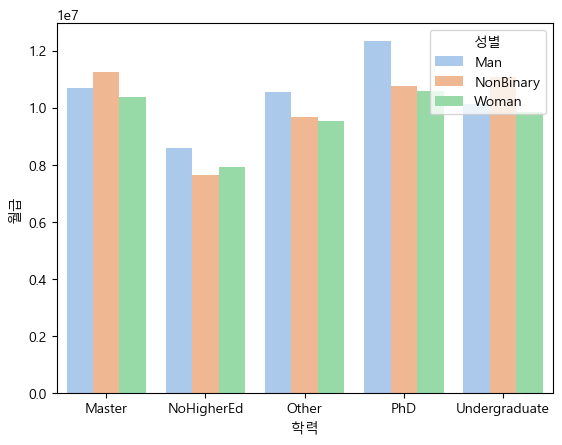

In [120]:
import seaborn as sns 

# seaborn lib의 주요 function 설명
# 1. sns.barplot(): 막대 그래프를 그리는 함수로, 범주형 데이터의 평균값을 시각화할 때 사용
# 2. sns.lineplot(): 선 그래프를 그리는 함수로, 시간에 따른 변화나 추세를 시각화할 때 사용
# 3. sns.scatterplot(): 산점도를 그리는 함수로, 두 변수 간의 관계를 시각화할 때 사용
# 4. sns.boxplot(): 박스 플롯을 그리는 함수로, 데이터의 분포와 이상치를 시각화할 때 사용

sns.barplot(data=df_multi_index, x = "학력", y = "월급", hue = "성별", palette= "pastel" )
# palette 속성
# 'magma': 어두운 색에서 밝은 색으로 변하는 색상 조합 (히트맵 등에서 자주 사용)
# 'pastel': 부드럽고 밝은 색
# 'muted': 좀 더 중립적이고 muted한 색상
# 'deep': 강하고 선명한 색상
# 'Set1', 'Set2', 'Set3': 다양한 카테고리별 색상 팔레트
# 'coolwarm': 시원한 색에서 따뜻한 색으로 변화하는 팔레트
# 'Blues', 'Reds', 'Greens': 색상별로 나누어진 팔레트
# 'cubehelix': 흑백 대비가 강조된 색상
plt.legend(loc='upper right', title='성별')
plt.show()

,국적,월급,나이
일련번호,,,
DEV1,Germany,8952758,<35
DEV2,Canada,5343970,<35
DEV3,Germany,9015424,>35
DEV4,United Kingdom of Great Britain and Northern I...,7935394,>35
DEV5,Germany,7011970,<35
...,...,...,...
DEV33462,United States of America,10888333,<35
DEV33463,Germany,4755885,<35
DEV33464,United States of America,13320833,>35


월급
국적                                                 나이               
Canada                                             <35  9.106169e+06
                                                   >35  1.124621e+07
Germany                                            <35  7.078597e+06
                                                   >35  9.733573e+06
India                                              <35  2.595077e+06
                                                   >35  4.874693e+06
Japan                                              <35  6.508257e+06
                                                   >35  8.962323e+06
South Korea                                        <35  4.798354e+06
                                                   >35  7.526458e+06
United Kingdom of Great Britain and Northern Ir... <35  8.364196e+06
                                                   >35  1.070901e+07
United States of America                           <35  1.310789e+07
                                                   >35  1.579429e+07

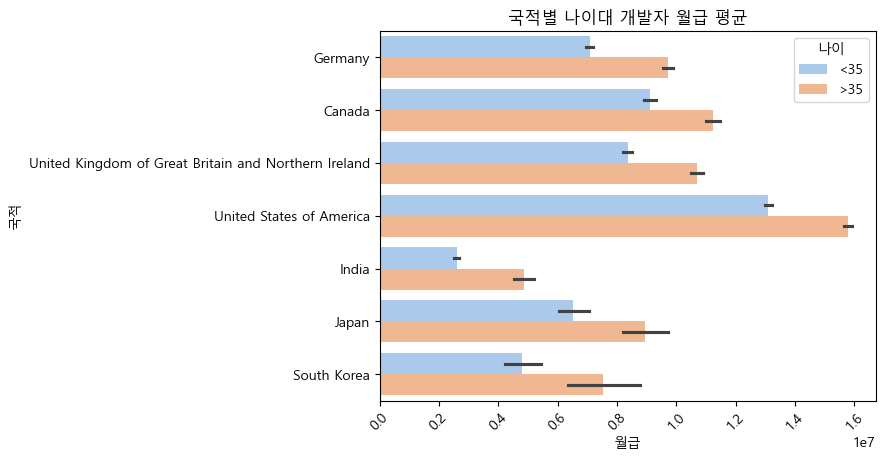

In [129]:
# 성별, 학력, 평균월급 가져오기 
df_multi_nation = data[["국적","월급","나이"]]

display(df_multi_nation)

# 멀티인덱스 데이터프레임 생성 평균을 구한다. => values는 월급이다.  indexer는 국적과 나이이다. 
df_multi_index_nation = df_multi_nation.groupby(["국적", "나이"]).mean()
display(df_multi_index_nation)

import seaborn as sns

# barplot의 속성을 넣어야한다 . (data, x, y, hue, palette)
sns.barplot(data = df_multi_nation, x= "월급", y = "국적", hue = "나이", palette= "pastel" )




# figure 크기 조정 및 레이블 설정
plt.legend(loc='upper right', title='나이')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.title('국적별 나이대 개발자 월급 평균')
plt.show()


In [ ]:
# 국적, 학적 기준으로 해서 월급의 최소, 최대, 평균, 중앙값 얼마인지 확인하기. 

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ---------- ----------------------------- 9.7/38.4 MB 49.7 MB/s eta 0:00:01
   ------------------- -------------------- 18.6/38.4 MB 46.4 MB/s eta 0:00:01
   --------------------------------- ------ 32.0/38.4 MB 52.8 MB/s eta 0:00:01
   ---------------------------------------- 38.4/38.4 MB 48.9 MB/s eta 0:00:00


min  \
국적                                                 학력                       
Canada                                             Master            9150   
                                                   NoHigherEd      840950   
                                                   Other            12046   
                                                   PhD            3679445   
                                                   Undergraduate    11815   
Germany                                            Master            8108   
                                                   NoHigherEd       12510   
                                                   Other           119540   
                                                   PhD               8687   
                                                   Undergraduate     9382   
India                                              Master             115   
                                                   NoHigherEd       58380   
                                                   Other             1390   
                                                   PhD             776315   
                                                   Undergraduate      810   
Japan                                              Master             926   
                                                   NoHigherEd     2062760   
                                                   Other              579   
                                                   PhD             508740   
                                                   Undergraduate      347   
South Korea                                        Master            2780   
                                                   NoHigherEd         347   
                                                   Other          2750578   
                                                   PhD            4855617   
                                                   Undergraduate      463   
United Kingdom of Great Britain and Northern Ir... Master            7992   
                                                   NoHigherEd      360010   
                                                   Other             2432   
                                                   PhD             449201   
                                                   Undergraduate     4633   
United States of America                           Master             115   
                                                   NoHigherEd       11583   
                                                   Other             4170   
                                                   PhD              20502   
                                                   Undergraduate      115   

                                                                       max  \
국적                                                 학력                        
Canada                                             Master         24420794   
                                                   NoHigherEd     21901535   
                                                   Other          24873007   
                                                   PhD            24529793   
                                                   Undergraduate  25777550   
Germany                                            Master         25544030   
                                                   NoHigherEd     25199889   
                                                   Other          25042703   
                                                   PhD            25042703   
                                                   Undergraduate  25941106   
India                                              Master         25715000   
                                                   NoHigherEd      8067560   
                                                   Other          24102600   
                                                  

=== 전체 월급 데이터 통계 요약 ===
평균: 10311833원
중앙값: 9601425원
표준편차: 6174721원
최솟값: 115원
최댓값: 25946666원

평균과 중앙값의 차이: 710408원
→ 평균이 더 크므로 고소득자들이 평균을 끌어올림 (우편향 분포)


C:\Users\lgdx\AppData\Local\Temp\ipykernel_14288\3240791829.py:105: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\lgdx\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


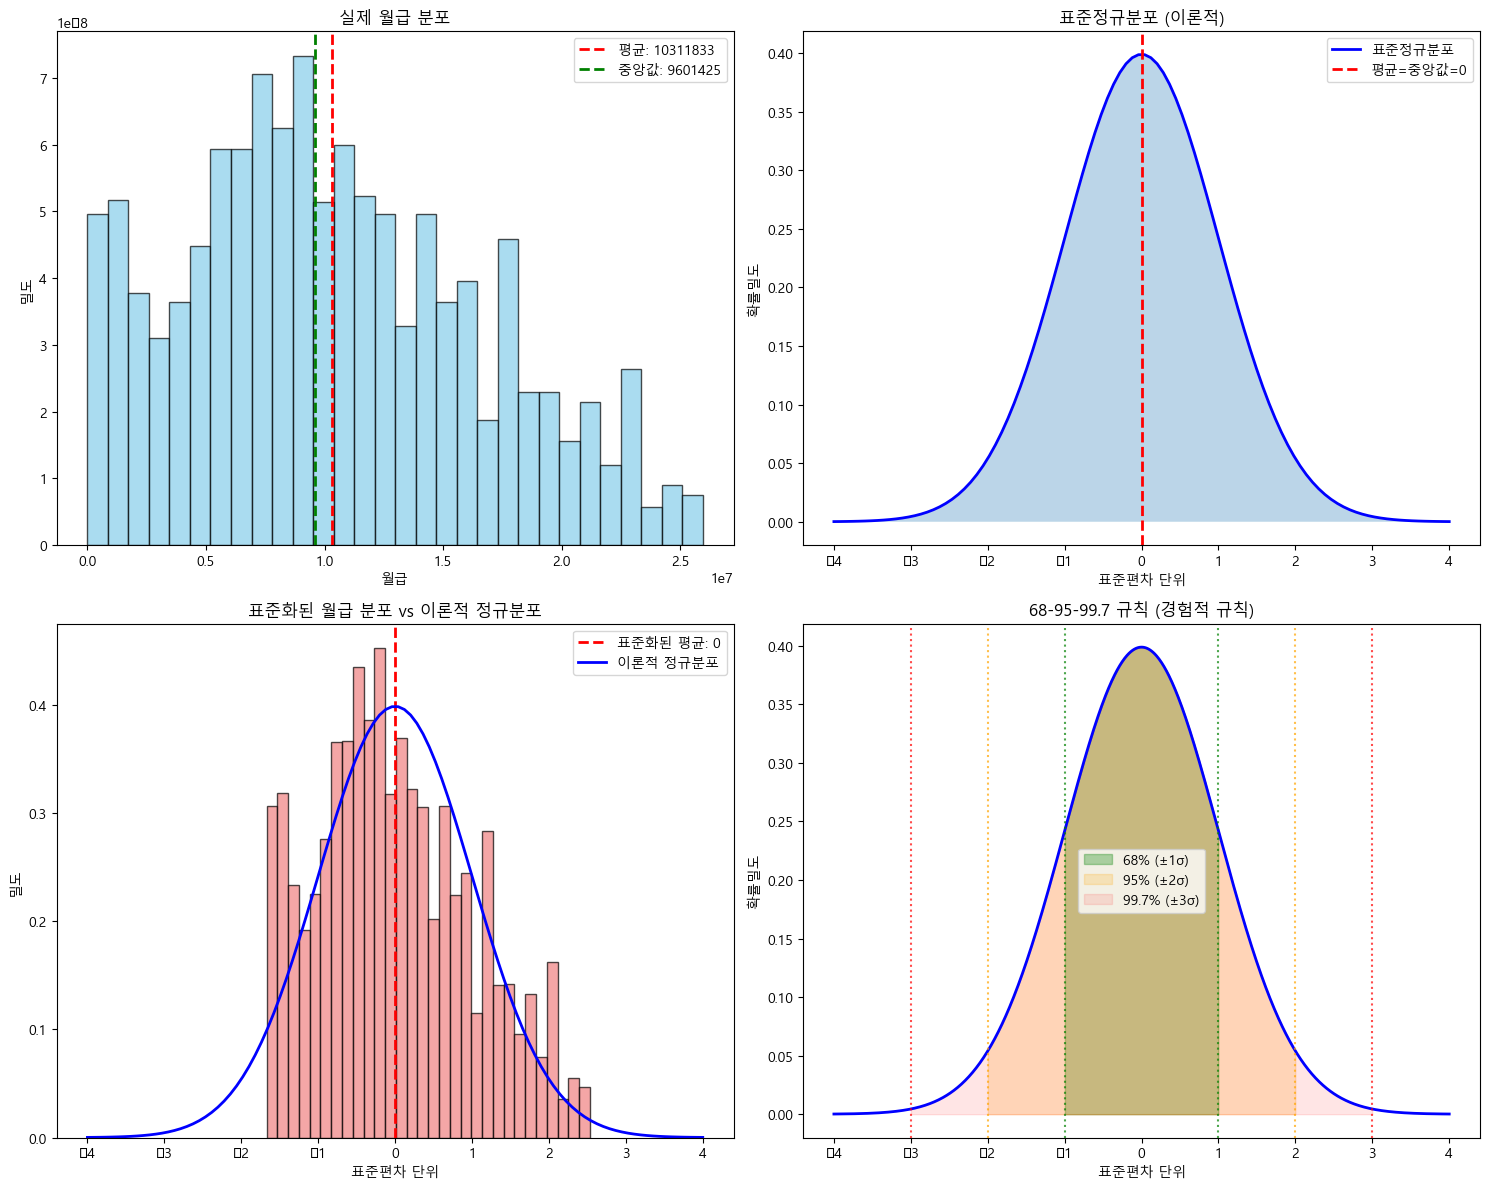


=== 68-95-99.7 규칙을 실제 데이터에 적용 ===
평균 ± 1 표준편차 범위: 4137112 ~ 16486553원
평균 ± 2 표준편차 범위: -2037609 ~ 22661274원
평균 ± 3 표준편차 범위: -8212330 ~ 28835995원

실제 데이터에서:
±1σ 내 데이터 비율: 64.9% (이론값: 68%)
±2σ 내 데이터 비율: 96.1% (이론값: 95%)
±3σ 내 데이터 비율: 100.0% (이론값: 99.7%)

=== 정규성 검정 (Shapiro-Wilk) ===
검정통계량: 0.9726
p-value: 0.0000
→ 데이터가 정규분포를 따르지 않습니다 (p < 0.05)


In [ ]:
# 국적, 학력 기준으로 월급의 최소, 최대, 평균, 중앙값, 표준편차 확인하기
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install scipy 
from scipy import stats

# 국적, 학력별 다양한 통계량 계산
stats_result = data.groupby(['국적', '학력'])['월급'].agg([
    'min',      # 최솟값
    'max',      # 최댓값  
    'mean',     # 평균
    'median',   # 중앙값(중위수)
    'std'       # 표준편차
]).round(0)

display(stats_result)

# 전체 데이터의 통계 요약
print("=== 전체 월급 데이터 통계 요약 ===")
mean_val = data['월급'].mean()
median_val = data['월급'].median()
std_val = data['월급'].std()
min_val = data['월급'].min()
max_val = data['월급'].max()

print(f"평균: {mean_val:.0f}원")
print(f"중앙값: {median_val:.0f}원") 
print(f"표준편차: {std_val:.0f}원")
print(f"최솟값: {min_val:.0f}원")
print(f"최댓값: {max_val:.0f}원")

# 평균과 중앙값의 차이 확인
diff = mean_val - median_val
print(f"\n평균과 중앙값의 차이: {diff:.0f}원")
if diff > 0:
    print("→ 평균이 더 크므로 고소득자들이 평균을 끌어올림 (우편향 분포)")
else:
    print("→ 중앙값이 더 크므로 저소득자들이 평균을 끌어내림 (좌편향 분포)")

# ============== 정규분포와 실제 데이터 분포 비교 시각화 ==============
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 실제 월급 분포 히스토그램
axes[0,0].hist(data['월급'], bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'평균: {mean_val:.0f}')
axes[0,0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'중앙값: {median_val:.0f}')
axes[0,0].set_title('실제 월급 분포')
axes[0,0].set_xlabel('월급')
axes[0,0].set_ylabel('밀도')
axes[0,0].legend()

# 2. 표준정규분포 (이론적)
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)
axes[0,1].plot(x, y, 'b-', linewidth=2, label='표준정규분포')
axes[0,1].axvline(0, color='red', linestyle='--', linewidth=2, label='평균=중앙값=0')
axes[0,1].fill_between(x, y, alpha=0.3)
axes[0,1].set_title('표준정규분포 (이론적)')
axes[0,1].set_xlabel('표준편차 단위')
axes[0,1].set_ylabel('확률밀도')
axes[0,1].legend()

# 3. 정규분포로 변환한 월급 분포
normalized_salary = (data['월급'] - mean_val) / std_val
axes[1,0].hist(normalized_salary, bins=30, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,0].axvline(0, color='red', linestyle='--', linewidth=2, label='표준화된 평균: 0')
# 이론적 정규분포 곡선 오버레이
x_norm = np.linspace(-4, 4, 100)
y_norm = stats.norm.pdf(x_norm, 0, 1)
axes[1,0].plot(x_norm, y_norm, 'b-', linewidth=2, label='이론적 정규분포')
axes[1,0].set_title('표준화된 월급 분포 vs 이론적 정규분포')
axes[1,0].set_xlabel('표준편차 단위')
axes[1,0].set_ylabel('밀도')
axes[1,0].legend()

# 4. 68-95-99.7 규칙 시각화
x_rule = np.linspace(-4, 4, 1000)
y_rule = stats.norm.pdf(x_rule, 0, 1)
axes[1,1].plot(x_rule, y_rule, 'b-', linewidth=2)

# 68% 영역 (1 표준편차)
axes[1,1].fill_between(x_rule, y_rule, where=(x_rule >= -1) & (x_rule <= 1), 
                       alpha=0.3, color='green', label='68% (±1σ)')
# 95% 영역 (2 표준편차)
axes[1,1].fill_between(x_rule, y_rule, where=(x_rule >= -2) & (x_rule <= 2), 
                       alpha=0.2, color='orange', label='95% (±2σ)')
# 99.7% 영역 (3 표준편차)
axes[1,1].fill_between(x_rule, y_rule, where=(x_rule >= -3) & (x_rule <= 3), 
                       alpha=0.1, color='red', label='99.7% (±3σ)')

axes[1,1].axvline(-1, color='green', linestyle=':', alpha=0.7)
axes[1,1].axvline(1, color='green', linestyle=':', alpha=0.7)
axes[1,1].axvline(-2, color='orange', linestyle=':', alpha=0.7)
axes[1,1].axvline(2, color='orange', linestyle=':', alpha=0.7)
axes[1,1].axvline(-3, color='red', linestyle=':', alpha=0.7)
axes[1,1].axvline(3, color='red', linestyle=':', alpha=0.7)

axes[1,1].set_title('68-95-99.7 규칙 (경험적 규칙)')
axes[1,1].set_xlabel('표준편차 단위')
axes[1,1].set_ylabel('확률밀도')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# ============== 실제 데이터에 68-95-99.7 규칙 적용 ==============
print("\n=== 68-95-99.7 규칙을 실제 데이터에 적용 ===")
print(f"평균 ± 1 표준편차 범위: {mean_val - std_val:.0f} ~ {mean_val + std_val:.0f}원")
print(f"평균 ± 2 표준편차 범위: {mean_val - 2*std_val:.0f} ~ {mean_val + 2*std_val:.0f}원")
print(f"평균 ± 3 표준편차 범위: {mean_val - 3*std_val:.0f} ~ {mean_val + 3*std_val:.0f}원")

# 실제 데이터에서 각 범위에 포함되는 비율 계산
within_1std = ((data['월급'] >= mean_val - std_val) & (data['월급'] <= mean_val + std_val)).mean() * 100
within_2std = ((data['월급'] >= mean_val - 2*std_val) & (data['월급'] <= mean_val + 2*std_val)).mean() * 100
within_3std = ((data['월급'] >= mean_val - 3*std_val) & (data['월급'] <= mean_val + 3*std_val)).mean() * 100

print(f"\n실제 데이터에서:")
print(f"±1σ 내 데이터 비율: {within_1std:.1f}% (이론값: 68%)")
print(f"±2σ 내 데이터 비율: {within_2std:.1f}% (이론값: 95%)")
print(f"±3σ 내 데이터 비율: {within_3std:.1f}% (이론값: 99.7%)")

# 정규성 검정
shapiro_stat, shapiro_p = stats.shapiro(data['월급'].sample(5000) if len(data) > 5000 else data['월급'])
print(f"\n=== 정규성 검정 (Shapiro-Wilk) ===")
print(f"검정통계량: {shapiro_stat:.4f}")
print(f"p-value: {shapiro_p:.4f}")
if shapiro_p < 0.05:
    print("→ 데이터가 정규분포를 따르지 않습니다 (p < 0.05)")
else:
    print("→ 데이터가 정규분포를 따를 가능성이 있습니다 (p ≥ 0.05)")

In [134]:
# 국적, 학력 기준으로 해서 월급의 최소, 최대, 평균, 중앙값 얼마인지 확인하기!
group = data.groupby(["국적", "학력"])["월급"].agg(["min", "max", "mean","median"])

In [138]:
# 한국인 학사 월급의 평균
group.loc[("South Korea", "Undergraduate"),"mean"]

np.float64(5695626.045454546)